In [ ]:
import datetime as dt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
# from scipy.stats import mannwhitneyu, ttest_ind

In [ ]:
import scienceplots
plt.style.use(['science', 'no-latex', 'russian-font'])

sns.set_palette('colorblind')
# sns.set_context('talk')
plt.rcParams["font.family"] = "Times"
plt.rcParams.update({'font.size':16})

In [ ]:
LANGUAGE = "RU"

In [ ]:
acid_namer = {'Hydrochloric': 'HCl', 
              'Oxalic':'Щавелевая', 
              'Citric':'Лимонная', 
              'Salicylic': 'Салициловая', 
              'Benzoic': 'Бензойная'}

# df['parameter_ru'] = df['parameter'].apply(lambda x: acid_namer[x])


label_name = {'RU': 'Мин. - Медиана - Макс.', 'EN': 'Min - Median - Max'}

label_name_hline = {'RU': 'Исх. биотит', 'EN': 'In biotite'}


xlabel = {'RU': 'Дни', 'EN':'Days'}

unit_solution = {'RU':'$ммоль/л$', 'EN':'$mmol/l$'}

In [ ]:
def remove_noize(df:pd.DataFrame):
    df = df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    mask = df['type']!='background'
    for element in elemetns:
        df.loc[mask, element] = df.loc[mask, element] - df.loc[~mask, element].values[0]
        df.loc[df[element]<0, element]=0
    return df

def ppm_to_mmol(df:pd.DataFrame):
    df=df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

    for element in elemetns:
        df.loc[:, element] = df.loc[:, element] / dict_AEM[element]
    return df

In [ ]:
df = pd.read_excel('../data/Воробьева_25012024.xlsx')

df = df.drop(columns=['code'])

df = ppm_to_mmol(remove_noize(df))

df.head()

,type,days,Al,Ca,Fe,K,Mg,Si,рН,ОВП,ЭП
0,background,0,0.000219,0.09500,0.000090,0.007436,0.002058,0.008679,6.582,243.3,445.3
1,bacteria,4,0.220480,0.07825,0.103143,0.224872,0.865021,0.398107,3.559,67.6,565.7
2,bacteria,4,0.223706,0.13100,0.098666,0.229487,0.888889,0.410786,3.593,59.2,553.1
3,bacteria,4,0.235673,0.03375,0.124577,0.247436,0.911934,0.420714,3.160,107.1,677.1
4,bacteria,7,0.138078,0.03075,0.044820,0.249744,0.918519,0.502536,4.189,61.5,507.3


In [ ]:
df = df.iloc[1: , :]

In [ ]:
df = df.drop(columns=['Ca'])

In [ ]:
species_namer = {'bacteria': 'Бактерии', 
              'control':'Контроль', 
              'fungi':'Грибы'}

df['type_ru'] = df['type'].apply(lambda x: species_namer[x])
df['type_ru'].unique()

array(['Бактерии', 'Грибы', 'Контроль'], dtype=object)

## 2. Plots
----

Динамика элементов в зависиммости от типа влияния 

In [ ]:
!mkdir ../plots/microbs_fungi/

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


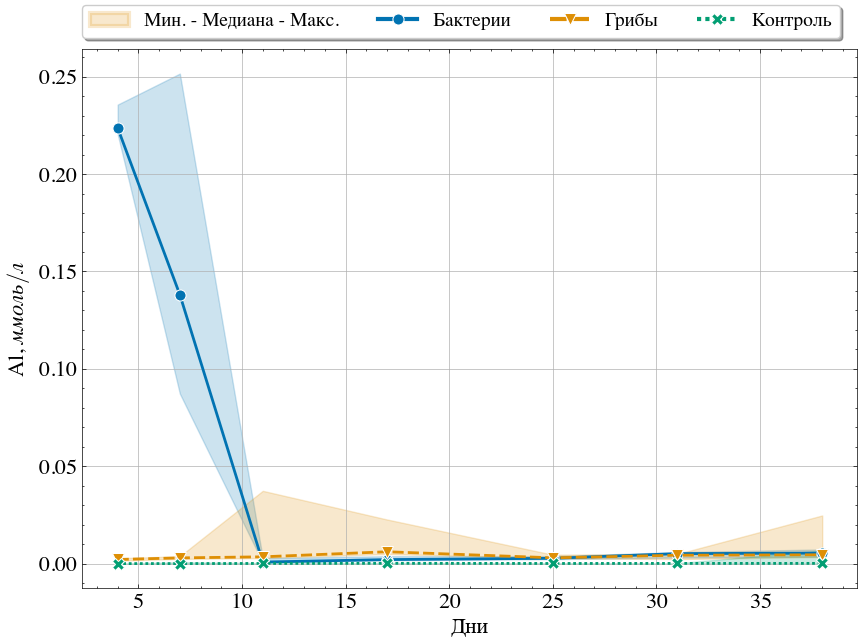

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


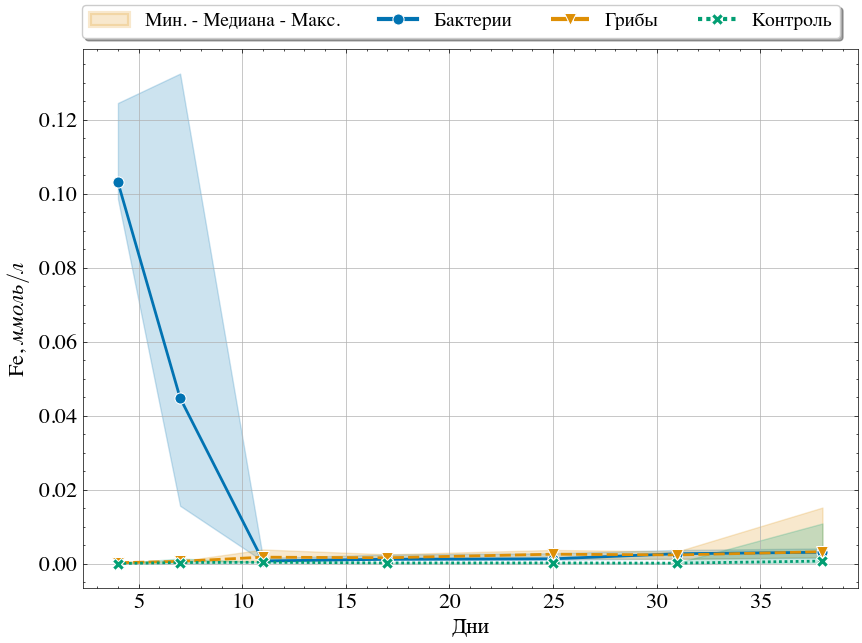

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


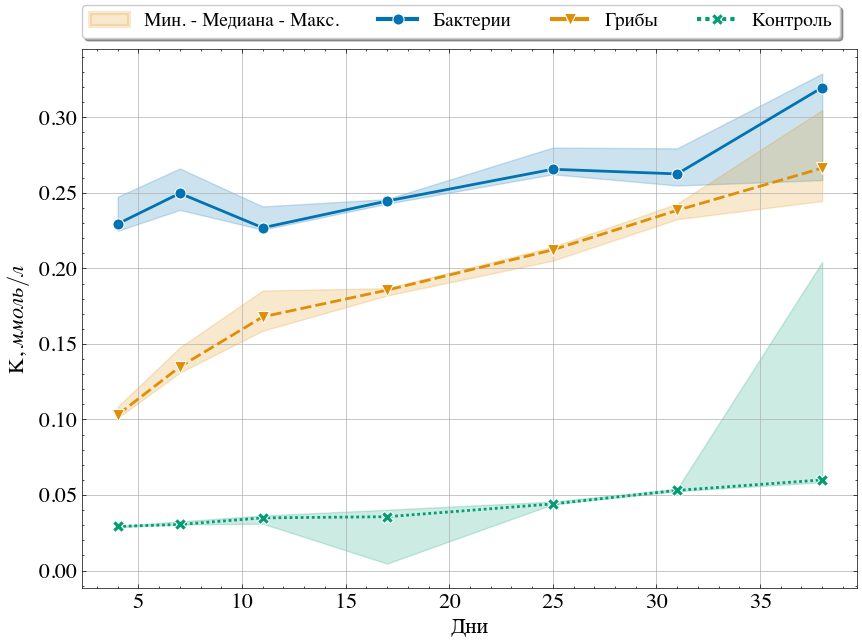

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


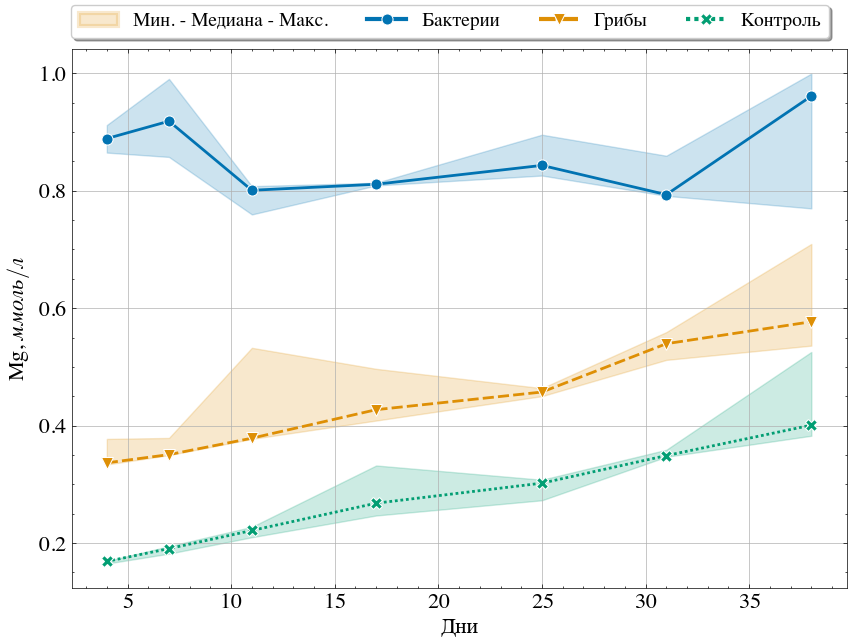

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:6: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3453156395.py:29: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


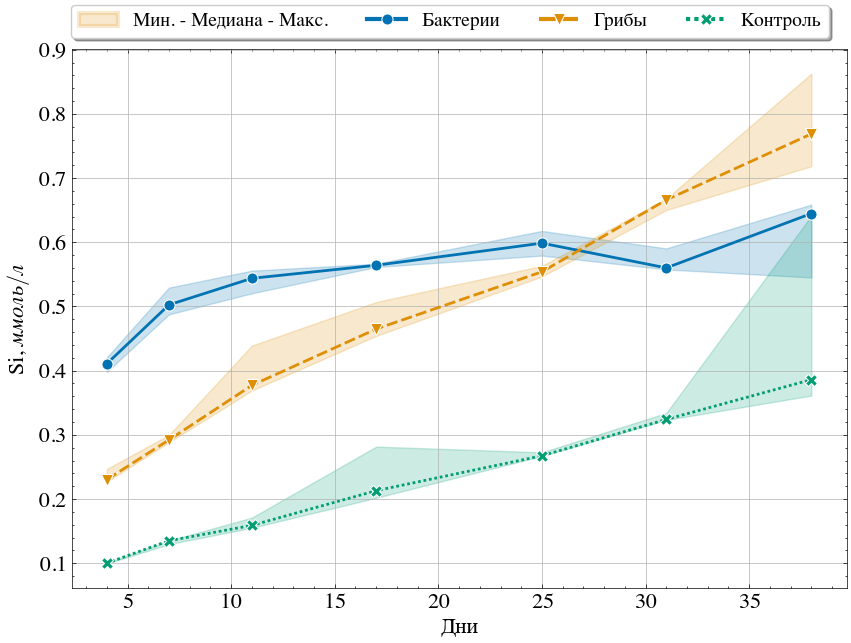

In [ ]:
folder = '../plots/microbs_fungi'
elements=['Al', 'Fe', 'K', 'Mg', 'Si']
for i, element in enumerate(elements):
    
    fig, ax = plt.subplots(1,1, figsize=(10,7))
    sns.lineplot(x='days',
                 y=element,
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type_ru', 
                 hue='type_ru',
                 ax=ax
                )
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    leg=ax.legend(frameon=True,           
               bbox_to_anchor=(.99, 1.10),
               fontsize=14,  
               ncol=4,
               shadow=True,)
    
#     leg = ax.legend()
    ax.set_ylabel(element+f', {unit_solution[LANGUAGE]}')
    ax.set_xlabel(xlabel[LANGUAGE])
    for i in leg.legendHandles:
        i.set_linewidth(3)
    fname = os.path.join(folder, element+'_'+LANGUAGE+'.png')
    plt.savefig(fname,  dpi=300)
    plt.show()
    # break

## 3. Plots

In [ ]:
df_melted = pd.melt(df, id_vars= ['type_ru', 'days'],
        value_vars=['Al', 'Fe', 'K', 'Mg', 'Si', 'рН', 'ОВП','ЭП'])

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/2840740577.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/2840740577.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


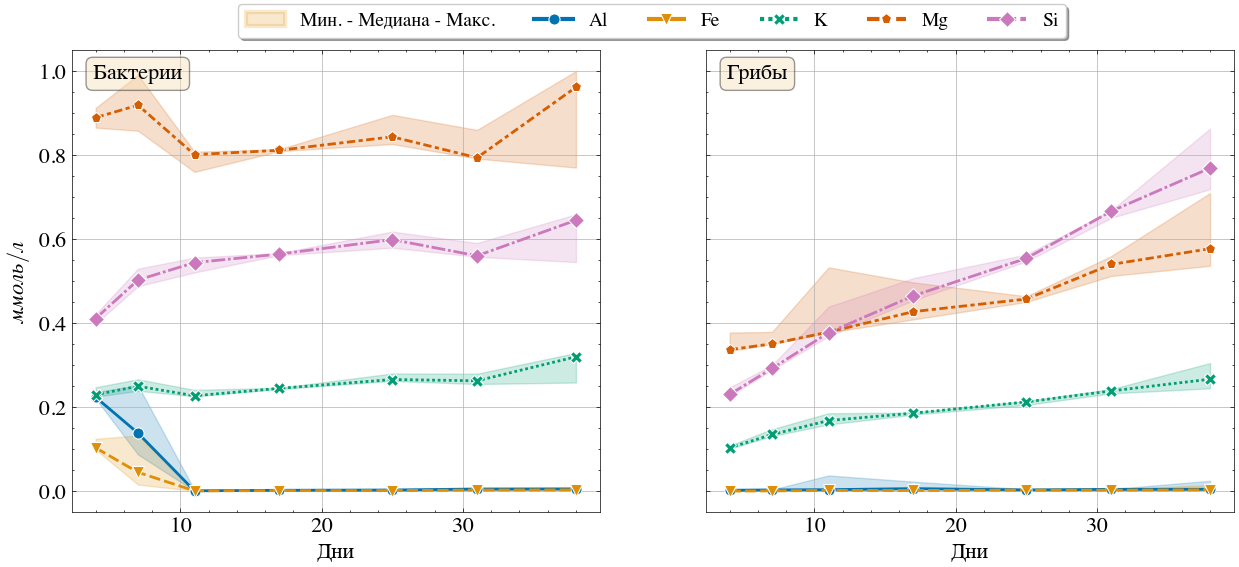

In [ ]:
folder = '../plots/microbs_fungi'
elements=['Al', 'Fe', 'K', 'Mg', 'Si']

fig, axes = plt.subplots(1,2, figsize=(15,6), sharey=True)
axes=axes.flatten()
for i, exp_type in enumerate(df['type_ru'].unique()[:2]):
    mask = (df_melted['type_ru'] == exp_type) & (df_melted['variable'].isin(elements))
    ax=axes[i]
    # fig, ax = plt.subplots(1,1, figsize=(10,7))
    sns.lineplot(x='days',
                 y='value',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df_melted.loc[mask], 
                 style = 'variable', 
                 hue='variable',
                 ax=ax
                )
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    if i==0:
        leg=ax.legend(frameon=True,           
                   bbox_to_anchor=(1.9, 1.12),
                   fontsize=14,  
                   ncol=7,
                   shadow=True,)
        
    #     leg = ax.legend()
    else:
        ax.legend('')
    ax.set_ylabel(unit_solution[LANGUAGE])
    ax.set_xlabel(xlabel[LANGUAGE])
    for i in leg.legendHandles:
        i.set_linewidth(3)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
    ax.text(0.04, 0.97, exp_type.capitalize(), transform=ax.transAxes, fontsize=16,
            verticalalignment='top', bbox=props)
    fname = os.path.join(folder, element+'.png')
    
    # plt.show()
    # break
fname = os.path.join(folder, 'Dynamic_Bact_Fungi_'+LANGUAGE+'.png')
plt.savefig(fname,  dpi=300)
# fig.tight_layout()
plt.show()

## 4. Plots

-----

Графики динамики pH 

In [ ]:
def remove_noize(df:pd.DataFrame):
    df = df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    mask = (df['days']==0)
    for element in elemetns:
        df.loc[mask, element] = df.loc[mask, element] - df.loc[~mask, element].values[0]
        df.loc[df[element]<0, element]=0
    return df

def ppm_to_mmol(df:pd.DataFrame):
    df=df.copy()
    elemetns = ['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    dict_AEM = {'Al':26.9,
            'Ca':40,
            'Fe':55.845, 
            'K':39,
            'Mg':24.30, 
            'Si':28}

    for element in elemetns:
        df.loc[:, element] = df.loc[:, element] / dict_AEM[element]
    return df

In [ ]:
df = pd.read_excel('../data/Воробьева_25012024.xlsx', sheet_name='v2')
df = df.drop(columns=['code'])
df = ppm_to_mmol(remove_noize(df))

In [ ]:
df_upd = pd.concat([df.iloc[1:, :], df.iloc[[0], :]], axis=0)

In [ ]:
species_namer = {'bacteria': 'Бактерии', 
              'control':'Контроль', 
              'fungi':'Грибы'}

df['type_ru'] = df['type'].apply(lambda x: species_namer[x])
df['type_ru'].unique()

array(['Бактерии', 'Грибы', 'Контроль'], dtype=object)

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1750737122.py:2: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


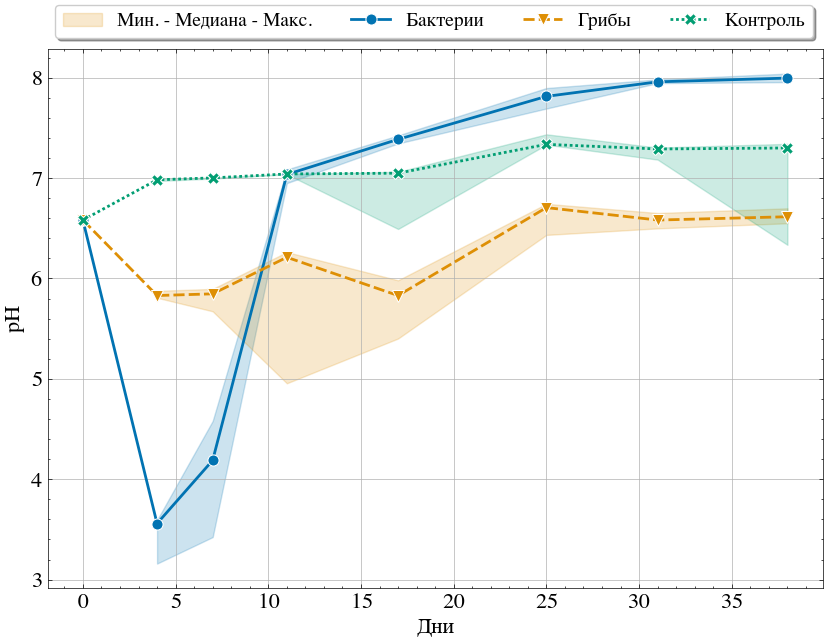

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
                 y='рН',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type_ru', 
                 hue='type_ru',
                 ax=ax
                )

ax.grid()
ax.collections[1].set_label(label_name[LANGUAGE])
ax.set_xlabel(xlabel[LANGUAGE])
leg=ax.legend(frameon=True,           
           bbox_to_anchor=(1, 1.10),
           fontsize=14,  
           ncol=5,
           shadow=True,)

plt.savefig(f'../plots/microbs_fungi/pH_{LANGUAGE}.png', dpi=300)

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/4132898698.py:2: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


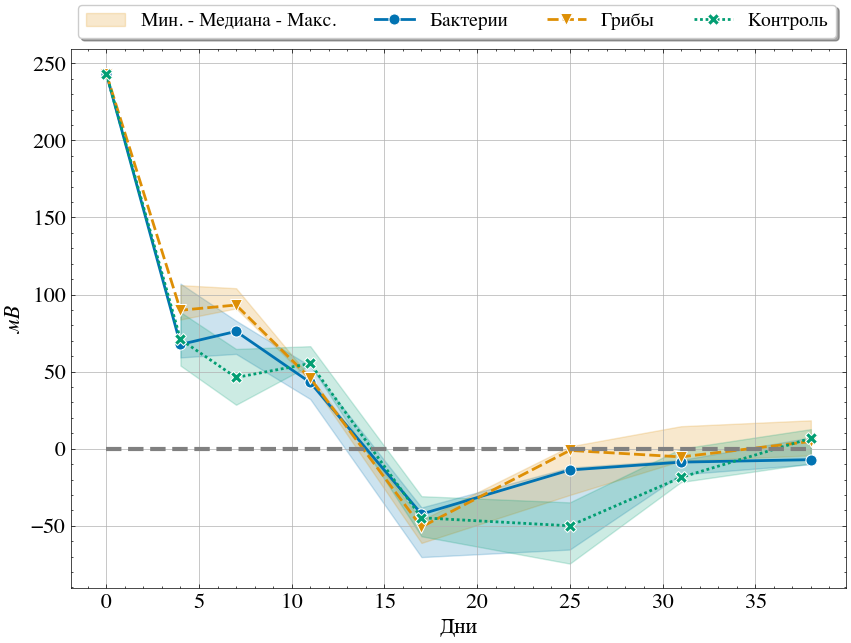

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
                 y='ОВП',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type_ru',
                 hue='type_ru',
                 ax=ax
                )

ax.grid()
ax.set_ylabel('$мВ$')
ax.hlines(0,0,df['days'].max(), linestyles='dashed', linewidth=3, colors='grey')
ax.collections[1].set_label(label_name[LANGUAGE])
ax.set_xlabel(xlabel[LANGUAGE])
leg=ax.legend(frameon=True,           
           bbox_to_anchor=(1, 1.10),
           fontsize=14,  
           ncol=5,
           shadow=True,)
plt.savefig(f'../plots/microbs_fungi/OVP_{LANGUAGE}.png', dpi=300)

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/57131776.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('${\mu}$S/см')
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/57131776.py:2: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


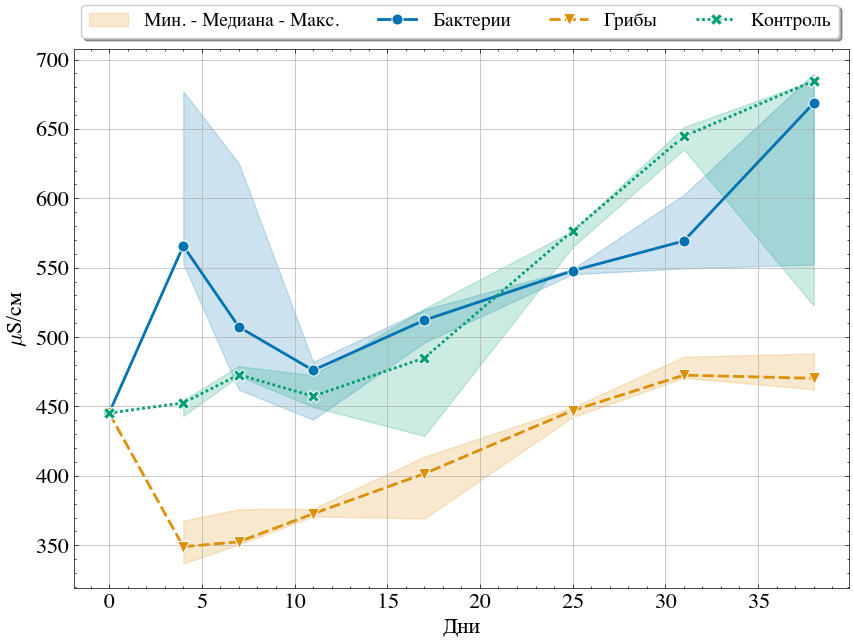

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
                 y='ЭП',
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                data=df, 
                 style = 'type_ru', 
                 hue='type_ru',
                 ax=ax
                )

ax.grid()
ax.set_ylabel('${\mu}$S/см')
# ax.hlines(0,0,df['days'].max(), linestyles='dashed', linewidth=3, colors='grey')
ax.collections[1].set_label(label_name[LANGUAGE])
ax.set_xlabel(xlabel[LANGUAGE])
leg=ax.legend(frameon=True,           
           bbox_to_anchor=(1, 1.10),
           fontsize=14,  
           ncol=5,
           shadow=True,)

plt.savefig(f'../plots/microbs_fungi/EP_{LANGUAGE}.png', dpi=300)

## 5. Plots

-------

Совместная динамика pH и Al

In [ ]:
data

,days,рН,Al
22,0,6.582,0.000000
23,4,5.808,0.002327
24,4,5.877,0.001729
25,4,5.830,0.002963
26,7,5.673,0.003978
27,7,5.847,0.002628
28,7,5.896,0.003145
29,11,6.263,0.003695
30,11,6.211,0.003074
31,11,4.956,0.037580


<Axes: xlabel='days', ylabel='Al'>

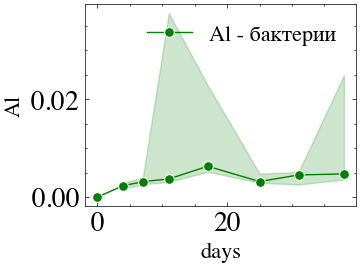

In [ ]:
 sns.lineplot(x = 'days', 
                 y=element,
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 data=data,
                 marker='o',
                markersize=7,
                 color="g",
                 label=f'{element} - бактерии')
    

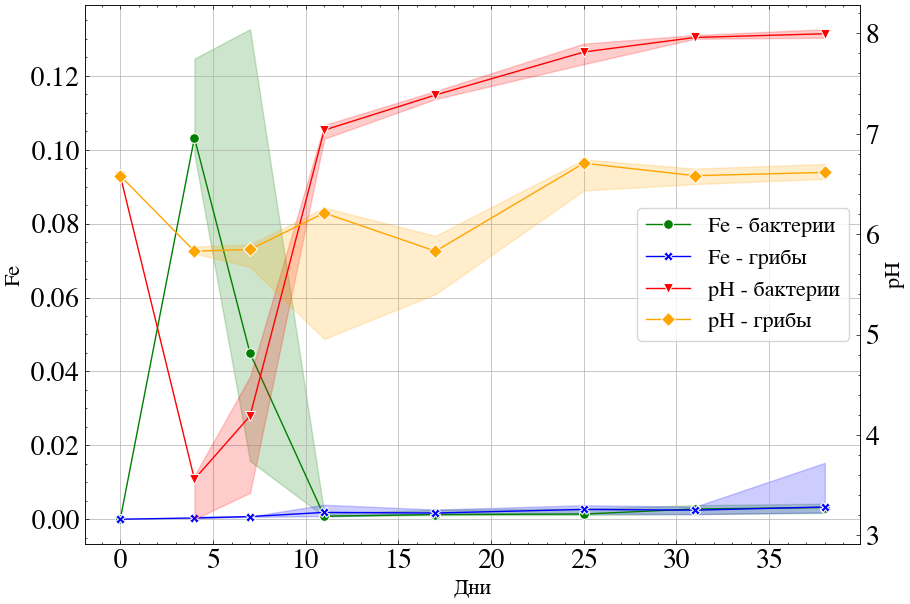

In [ ]:

type = 'bacteria'
# for element in ['Fe', 'Al']:
element = 'Fe'
mask = (df['type']==type)
fig, ax = plt.subplots(1,1, figsize=(10,7))
data = df.loc[mask, ['days', 'рН', element]]
sns.lineplot(x = 'days', 
             y=element,
             errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             data=data,
             marker='o',
            markersize=7,
             color="g",
             label=f'{element} - бактерии', ax=ax)

# ax2 = plt.twinx()
ax2 = ax.twinx()
sns.lineplot(x = 'days',
             y='рН', 
            errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             
             data=data,
             marker='v',
            markersize=7,
             label='pH - бактерии', 
             color="r", ax=ax2)

type = 'fungi'
mask = (df['type']==type)
data = df.loc[mask, ['days', 'рН', element]]
sns.lineplot(x = 'days',
             y=element,
             
             data=data,
             errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             marker='X',
            markersize=7,
             color="b", label=f'{element} - грибы', ax=ax)
sns.lineplot(x = 'days', 
             y='рН', 
             data=data, 
            errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             marker='D',
            markersize=7,
             label='pH - грибы', 
             color="orange", ax=ax2)

ax.grid()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=5, frameon=True)

ax.set_xlabel(xlabel[LANGUAGE])

leg=ax.legend('')           

plt.savefig(f'../plots/microbs_fungi/{element}_vs_pH_{LANGUAGE}.png', dpi=300)

In [ ]:
data

,days,рН,Fe
22,0,6.582,0.000000
23,4,5.808,0.000340
24,4,5.877,0.000233
25,4,5.830,0.000716
26,7,5.673,0.000663
27,7,5.847,0.000716
28,7,5.896,0.000752
29,11,6.263,0.001844
30,11,6.211,0.000824
31,11,4.956,0.003922


## 3. Отношения элементов к Si

In [ ]:
for element in ['Al', 'Fe', 'K', 'Mg']:
    df.loc[:, f'ratio_{element}_to_Si'] = df[element]/df['Si']    

In [ ]:
base_concetration = {"ratio_Mg_to_Si": 2.64/3.04, 
                    "ratio_Ca_to_Si": .11/3.04, 
                    "ratio_Fe_to_Si": 0.27/3.04, 
                    "ratio_Al_to_Si": 0.99/3.04,
                    "ratio_K_to_Si": 0.67/3.04,
                    "ratio_K_to_Mg": 0.67/2.64}

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1065724805.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


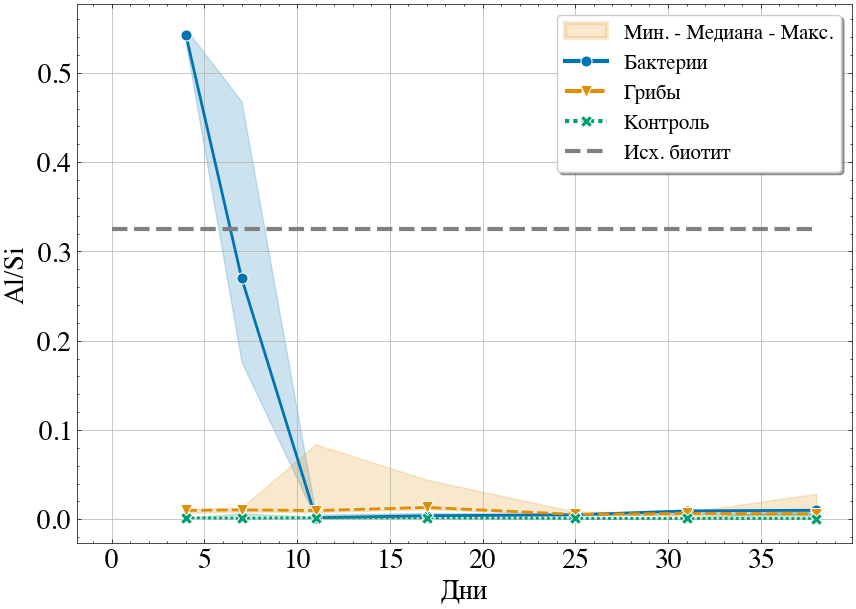

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1065724805.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


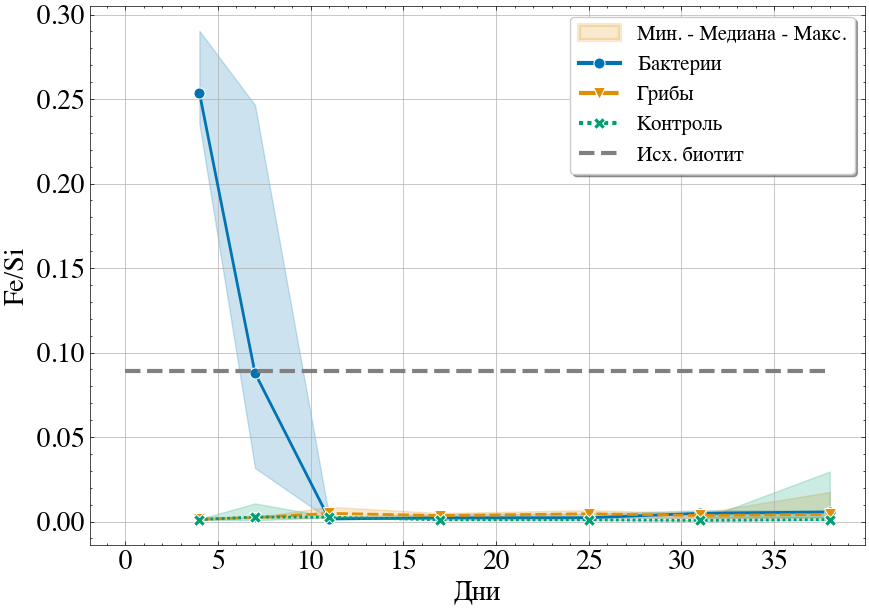

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1065724805.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


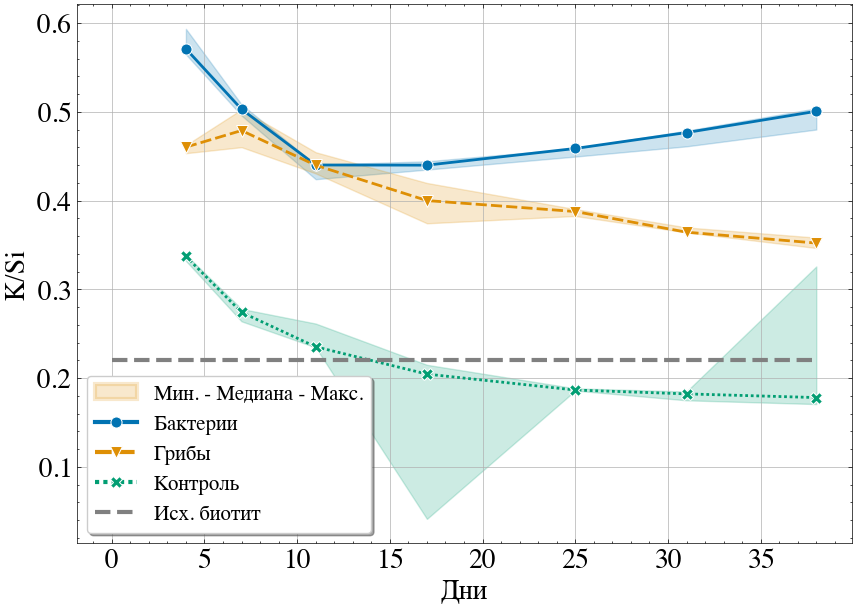

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1065724805.py:16: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',


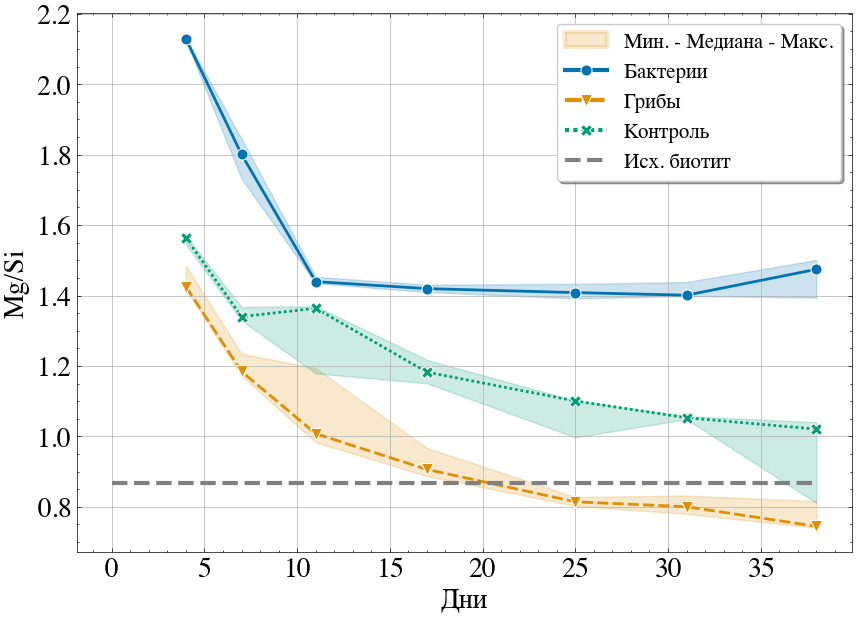

In [ ]:


# fig, axes = plt.subplots(3,2, figsize=(12,6))
# axes=axes.flatten()
font_size = 20
plt.rc('axes', titlesize=font_size)
plt.rc('xtick', labelsize=font_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_size)    # fontsize of the tick labels
folder = '../plots/'
ratios=['ratio_Al_to_Si', 'ratio_Fe_to_Si', 'ratio_K_to_Si','ratio_Mg_to_Si']
# ratios=['ratio_Mg_to_Si','ratio_Al_to_Si']
annots = ['A','Б','В', 'Г']
# fig, axes = plt.subplots(2,2, figsize=(15,5))
# axes=axes.flatten()
for i, element in enumerate(ratios):
    # ax=axes[i]
    fig, ax = plt.subplots(1,1, figsize=(10,7))
    sns.lineplot(x='days',
                 y=element,
                 markersize=8, 
                 markers=["o", "v", 'X', "p", 'D'],
                 errorbar=lambda x: (x.min(), x.max()),
                 estimator='median',
                 linewidth = 2,
                 data=df, 
                 style = 'type_ru', 
                 hue='type_ru',
                 ax=ax
                )
    
    ax.grid()
    ax.collections[1].set_label(label_name[LANGUAGE])
    ax.hlines(y=base_concetration[element], xmin=0, 
              xmax=38, 
              linestyles='dashed', 
              label = label_name_hline[LANGUAGE],# In biotite 
             linewidth=3, 
             color='grey', )
    # if i==1:
    leg=ax.legend(frameon=True,           
               # bbox_to_anchor=(1., 1.2),
               fontsize=15,  
               # ncol=4,
               shadow=True,)
    for j in leg.legend_handles:
        j.set_linewidth(3)
    # else:
        # ax.get_legend().remove()

#     leg = ax.legend()
    naming = element.split('_')[1] + '/' + element.split('_')[3]
    ax.set_ylabel(naming, fontsize=font_size)
    ax.set_xlabel(xlabel[LANGUAGE], fontsize=font_size)
        
    fname = os.path.join(folder, f'ratio_{element}_to_Si_{LANGUAGE}.png')
    plt.savefig(fname,  dpi=300)
    plt.show()
    

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1332878253.py:4: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.lineplot(x='days',
/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/1332878253.py:31: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for i in leg.legendHandles:


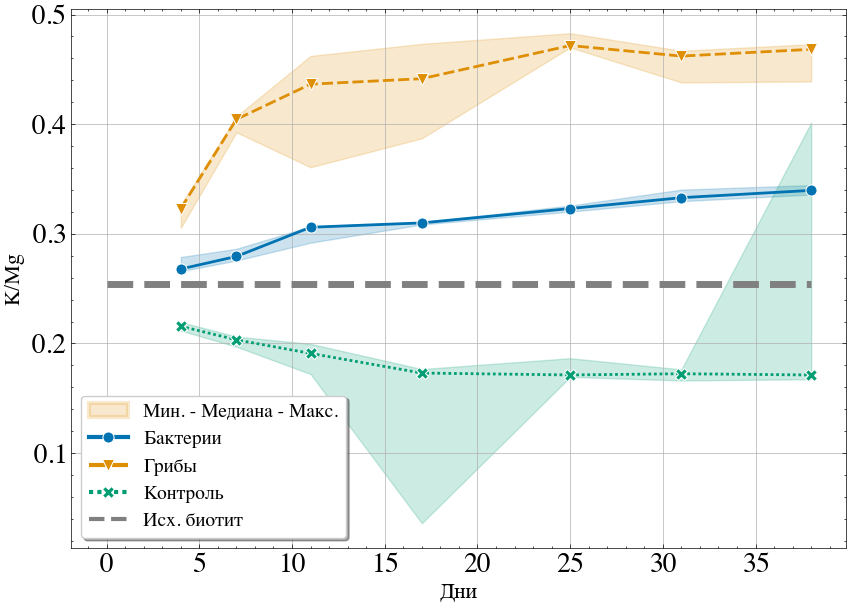

In [ ]:
folder = '../plots/'
df.loc[:, f'ratio_K_to_Mg'] = df['K']/df['Mg']
fig, ax = plt.subplots(1,1, figsize=(10,7))
sns.lineplot(x='days',
             y='ratio_K_to_Mg',
             markersize=8, 
             markers=["o", "v", 'X', "p", 'D'],
             errorbar=lambda x: (x.min(), x.max()),
             estimator='median',
             linewidth = 2, 
             data=df, 
             style = 'type_ru', 
             hue='type_ru',
             ax=ax
            )
ax.grid()
ax.collections[1].set_label(label_name[LANGUAGE])
ax.hlines(y=base_concetration['ratio_K_to_Mg'], xmin=0, xmax=38, 
          linestyles='dashed', 
          label = label_name_hline[LANGUAGE], 
         linewidth=5, 
         color='grey', )
leg=ax.legend(frameon=True,           
           # bbox_to_anchor=(0.91, 1.2),
           fontsize=14,  
           # ncol=3,
           shadow=True,)
# naming = element.split('_')[1] + '/' + element.split('_')[3]
ax.set_ylabel('K/Mg')
ax.set_xlabel(xlabel[LANGUAGE])
for i in leg.legendHandles:
    i.set_linewidth(3)
fname = os.path.join(folder, 'K_ratio_Mg'+'.png')
plt.savefig(fname,  dpi=300)
plt.show()

## Зависимость Eh от pH

In [ ]:
colors = sns.color_palette(palette='viridis_r', n_colors=df['days'].nunique())

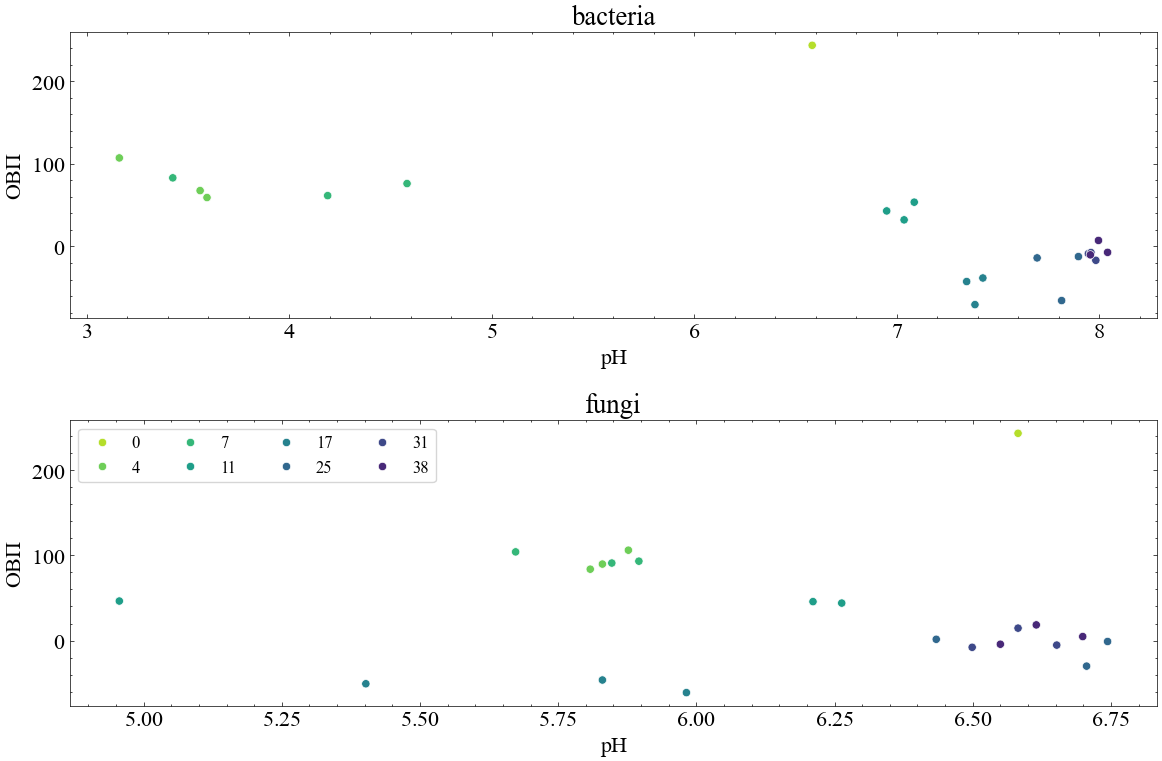

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
# for type in ['bacteria', 'fungi']:
mask = df['type']=='bacteria'
# sns.regplot(y='ОВП',x='рН', huedata=df.loc[mask],ax=ax, label=type)
sns.scatterplot(y='ОВП',x='рН', hue='days', palette=colors,  data=df.loc[mask], ax=ax1)
mask = df['type']=='fungi'
# sns.regplot(y='ОВП',x='рН', huedata=df.loc[mask],ax=ax, label=type)
sns.scatterplot(y='ОВП',x='рН', hue='days', palette=colors,  data=df.loc[mask], ax=ax2)
    # break
ax1.set_title('bacteria')
ax2.set_title('fungi')
ax1.legend('')
ax2.legend(frameon=True, ncol=4, fontsize=12)
fig.tight_layout()

In [ ]:
colors = sns.color_palette(palette='colorblind', n_colors=df['days'].nunique())

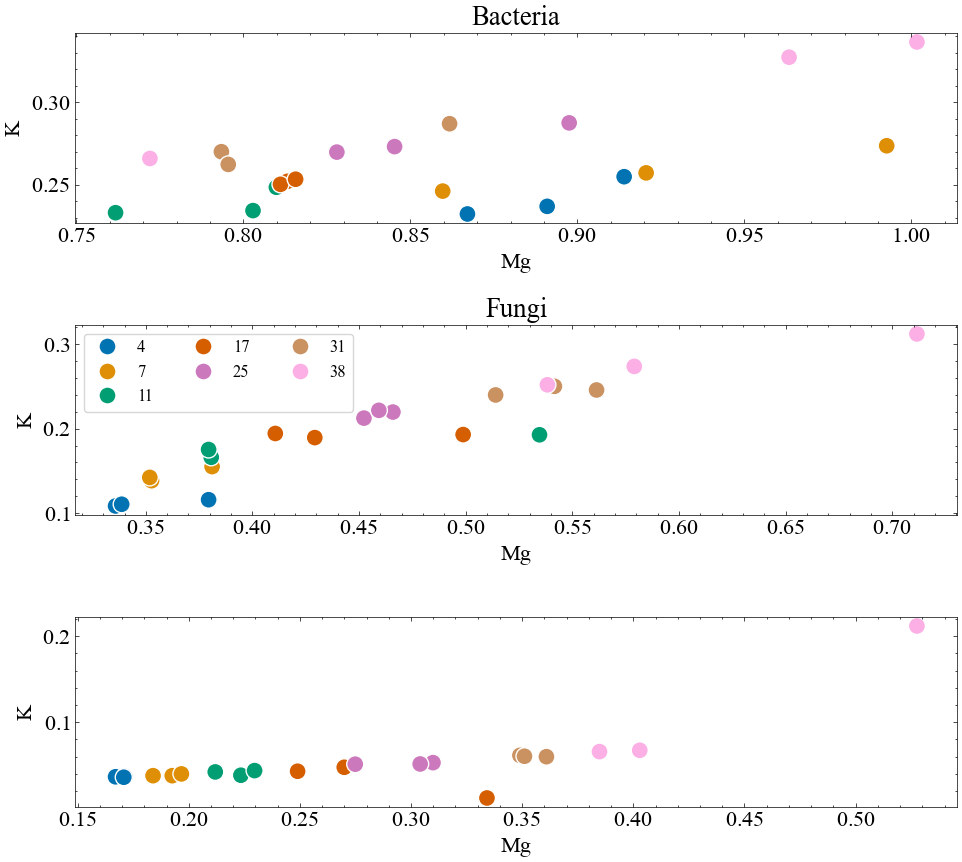

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,9))
# for type in ['bacteria', 'fungi']:
mask = (df['type']=='bacteria') & (df['days']!=0)
colors = sns.color_palette(palette='colorblind', n_colors=df.loc[mask, 'days'].nunique())
sns.scatterplot(y='K',x='Mg', hue='days', 
                palette=colors,s=150,
                data=df.loc[mask], ax=ax1)

mask = (df['type']=='fungi') & (df['days']!=0)
sns.scatterplot(y='K',x='Mg', hue='days',
                palette=colors,s=150, 
                data=df.loc[mask], ax=ax2)
    # break

mask = (df['type']=='control') & (df['days']!=0)
sns.scatterplot(y='K',x='Mg', hue='days',
                palette=colors,s=150, 
                data=df.loc[mask], ax=ax3)
    # break
ax1.set_title('Bacteria')
ax2.set_title('Fungi')
ax3.legend('Control')
ax1.legend('')
ax3.legend('')
ax2.legend(frameon=True, ncol=3, fontsize=12)
fig.tight_layout()

# Сравнение биотического и абиотического влияния

In [ ]:
def removeNoize(x: float, 
                acid: str,
                element: str,
               df_control: pd.DataFrame)-> float:
    """
    remove background values for each acid
    
    x: float - value in mmol/l without correction
    acid: str - kind of acid 
    element: str - element to correct
    df_control: pd.DataFrame - df with values for acids
    
    return float: corrected value
    """
    
    mask = df_control['parameter']==acid
    select = df_control.loc[mask, element]
    if len(select) == 0:
        print(acid, element)
    return x - select.values[0]

In [ ]:
# Read initial dataset
def get_df_abiotic():
    df = pd.read_excel('../data/data_ICP_2021_winter_2022.xlsx', sheet_name='ICP')
    
    
    # masses for elements in analysis
    dict_AEM = {'Al':26.9,
                'Ca':40,
                'Fe':55.845, 
                'K':39,
                'Mg':24.30, 
                'Si':28}
    
    cols = ['parameter', 'days', 'kind', 'code', 
            'Al', 'Ca', 'Fe', 'K', 'Mg', 'Si']
    df = df[cols]
    
    
    for key, value in dict_AEM.items():
        df.loc[:, key] = df.loc[:, key]/value
        
    mask = df['kind']=='control'
    df_control = df.loc[mask].copy()
    df = df.loc[~mask].copy()
    df = df.reset_index(drop=True)
    
    
    for key, value in dict_AEM.items():
        df.loc[:, key] = df.loc[:, ['parameter', key]].apply(lambda x: removeNoize(x[key], 
                                                                             x['parameter'], 
                                                                             element=key,
                                                                         df_control=df_control), axis=1)
    return df

abiotic = get_df_abiotic()

In [ ]:
abiotic_melted = pd.melt(abiotic, id_vars= ['parameter', 'days', 'kind'],
        value_vars=['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si'])

In [ ]:
abiotic_melted = pd.melt(abiotic, id_vars= ['parameter', 'days', 'kind'],
        value_vars=['Al', 'Ca', 'Fe', 'K', 'Mg', 'Si'])
abiotic_melted = abiotic_melted.drop(columns=['kind'])
abiotic_melted = abiotic_melted.rename(columns={'parameter': 'type'})
elements = ['K', 'Mg', 'Si']
mask = (abiotic_melted['days']==161)&(abiotic_melted['variable'].isin(elements))
bar_df = abiotic_melted.loc[mask]
bar_df.loc[:, 'value'] = bar_df['value']/10

In [ ]:
mask = (df_melted['days']==38)&(df_melted['variable'].isin(elements))
bio_bar_df = df_melted.loc[mask]
bio_bar_df.loc[:, 'value'] = bio_bar_df['value']/5

In [ ]:
# bar_df['type_ru']

acid_namer = {'Hydrochloric': 'HCl', 
              'Oxalic':'Щавелевая', 
              'Citric':'Лимонная', 
              'Salicylic': 'Салициловая', 
              'Benzoic': 'Бензойная'}

bar_df['type_ru'] = bar_df['type'].apply(lambda x: acid_namer[x])

/var/folders/bv/qr4369nx78g7fkr6lx4h5g6r0000gn/T/ipykernel_20933/3510816258.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_df['type_ru'] = bar_df['type'].apply(lambda x: acid_namer[x])


In [ ]:
bar = pd.concat([bio_bar_df, bar_df.drop(columns=['type'])])

In [ ]:
bar['type_ru'].unique()

array(['Бактерии', 'Грибы', 'Контроль', 'HCl', 'Щавелевая', 'Лимонная',
       'Салициловая', 'Бензойная'], dtype=object)

In [ ]:
# bar = bar.loc[bar['type']!='control']

In [ ]:
bar['type_ru'] = bar['type_ru'].str.capitalize()

In [ ]:
# bar = bar.drop(columns='days')

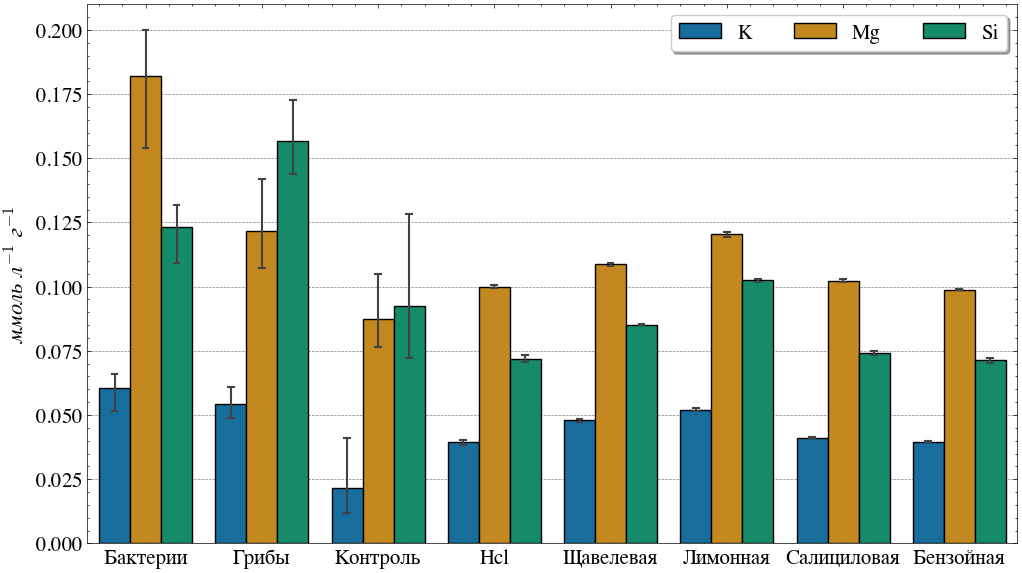

In [ ]:

fig,ax=plt.subplots(1,1,figsize=(12,7))
sns.barplot(x='type_ru', 
            y='value', 
            hue='variable', 
            data=bar,
            edgecolor='k',
            capsize=.15,
            # dodge=True,
            # errorbar=None,
           ax=ax)
leg=ax.legend(frameon=True,           
               # bbox_to_anchor=(0.69, 1.1),
               fontsize=15,  
               ncol=3,
              shadow=True,)

# ax.grid()
# ax.grid(zorder=0)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

ax.set_ylabel('$ммоль \\ л^{-1}  \\ г^{-1}$')
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_xlabel('')
plt.savefig(f'../plots/barplots_bio_vs_abiotic_{LANGUAGE}.png', dpi=300)
plt.show()